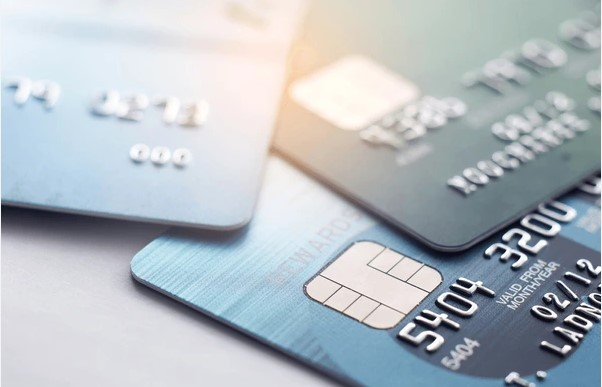

# **Credit Card Clustering**

### **by: Ajali Augustine Esosa**

This Machine Learning case study is on Unsupervised Learning. We will be using the Credit Card Customer Data for this case study.


## Problem Statement:
-----------------------------
 AllLife Bank wants to focus on its credit card customer base in the next financial year. They have been advised by their marketing research team, that the penetration in the market can be improved. Based on this input, the Marketing team proposes to run personalized campaigns to target new customers as well as upsell to existing customers. Another insight from the market research was that the customers perceive the support services of the bank poorly. Based on this, the Operations team wants to upgrade the service delivery model, to ensure that customers queries are resolved faster. The Head of Marketing and Head of Delivery both decide to reach out to the Data Science team for help.


## Objective:
-----------------------------

Identify different segments in the existing customer based on their spending patterns as well as past interaction with the bank.



--------------------------
## About the data:
--------------------------
Data is of various customers of a bank with their credit limit, the total number of credit cards the customer has, and different channels through which customer has contacted the bank for any queries, different channels include visiting the bank, online and through a call centre.

- Sl_no - Customer Serial Number
- Customer Key - Customer identification
- Avg_Credit_Limit	- Average credit limit (currency is not specified, you can make an assumption around this)
- Total_Credit_Cards	- Total number of credit cards
- Total_visits_bank	- Total bank visits
- Total_visits_online -	 Total online visits
- Total_calls_made - Total calls made

## **Importing Libraries and Overview of the Dataset**

In [1]:
# import all necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

#import clustering algorithms
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
!pip install scikit-learn-extra
from sklearn_extra.cluster import KMedoids
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings("ignore")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 9.8 MB/s eta 0:00:00


### **Loading The Datasets**

In [2]:
card_url = r'/content/drive/MyDrive/Credit+Card+Customer+Data.xlsx'
card_df = pd.read_excel(card_url)
print('card_df Shape:', card_df.shape)
card_df.head()

card_df Shape: (655, 7)


,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [3]:
card_df.tail()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
650,656,51108,99000,10,1,10,0
651,657,60732,84000,10,1,13,2
652,658,53834,145000,8,1,9,1
653,659,80655,172000,10,1,15,0
654,660,80150,167000,9,0,12,2


### Getting more info on datasets

In [4]:
card_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 655 entries, 0 to 654
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                655 non-null    int64
 1   Customer Key         655 non-null    int64
 2   Avg_Credit_Limit     655 non-null    int64
 3   Total_Credit_Cards   655 non-null    int64
 4   Total_visits_bank    655 non-null    int64
 5   Total_visits_online  655 non-null    int64
 6   Total_calls_made     655 non-null    int64
dtypes: int64(7)
memory usage: 35.9 KB


**Observations:**

- There are 655 observations and 7 columns in the dataset.
- All columns have 655 non-null values i.e. there are no missing values.
- All columns are of int64 data type.

There are no missing values in the card_df datasets

In [5]:
card_df.nunique()

Sl_No                  655
Customer Key           655
Avg_Credit_Limit       109
Total_Credit_Cards      10
Total_visits_bank        6
Total_visits_online     16
Total_calls_made        11
dtype: int64

- Customer key, which is an identifier, has no repeated values. We should treat the same accordingly before applying any algorithm.

## **Data Preprocessing and Exploratory Data Analysis**

we will make  a copy of the datasets

In [6]:
card_df_new = card_df.copy()

we will first drop the variables that are not required for our model

In [7]:
card_df.drop(columns=["Sl_No", "Customer Key"], inplace=True)

Now that we have dropped unnecessary column. We can again check for duplicates. Duplicates would mean customers with identical features.

In [8]:
card_df.duplicated().sum().sum()

11

In [9]:
card_df[card_df.duplicated()]

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
162,8000,2,0,3,4
175,6000,1,0,2,5
215,8000,4,0,4,7
295,10000,6,4,2,3
324,9000,4,5,0,4
360,18000,6,3,1,4
377,12000,6,5,2,1
384,8000,7,4,2,0
394,5000,4,5,0,1
452,47000,6,2,0,4


Now we will proceed to Dropping the Duplicates rows from the datasets

In [10]:
card_df = card_df.drop_duplicates()

card_df.duplicated().sum()

0

In [11]:
# one can use this to drop duplicates
# card_df = card_df[~card_df.duplicated()]

In [12]:
card_df.shape

(644, 5)

In [13]:
card_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 644 entries, 0 to 654
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Avg_Credit_Limit     644 non-null    int64
 1   Total_Credit_Cards   644 non-null    int64
 2   Total_visits_bank    644 non-null    int64
 3   Total_visits_online  644 non-null    int64
 4   Total_calls_made     644 non-null    int64
dtypes: int64(5)
memory usage: 30.2 KB


- After removing duplicated keys and rows and unnecessary columns, there are 644 unique observations and 5 columns in our data.

### **Summary Statistics**

In [14]:
card_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Avg_Credit_Limit,644.0,34543.478261,37428.704286,3000.0,11000.0,18000.0,48000.00,200000.0
Total_Credit_Cards,644.0,4.694099,2.175338,1.0,3.0,5.0,6.00,10.0
Total_visits_bank,644.0,2.395963,1.626964,0.0,1.0,2.0,4.00,5.0
Total_visits_online,644.0,2.624224,2.957728,0.0,1.0,2.0,4.00,15.0
Total_calls_made,644.0,3.608696,2.880025,0.0,1.0,3.0,5.25,10.0


**Observations:**

- The average credit limit has a high range as it has a minimum value of 3K and a maximum value of 200K.
- The mean of the average credit limit is approx 34.5K with a large standard deviation of 37.4K.
- The average number of cards per customer is approx 5 (rounding off to nearest integer).
- On average, a customer has 2 bank visits, 3 online visits, and made 4 calls.

#### Now let's go ahead with the exploring each variable at hand. We will check the distribution and outliers for each variable in the data.

### ie perform univariate analysis of the data set.

Avg_Credit_Limit
skewness: 2.19
Total_Credit_Cards
skewness: 0.17
Total_visits_bank
skewness: 0.15
Total_visits_online
skewness: 2.21
Total_calls_made
skewness: 0.65


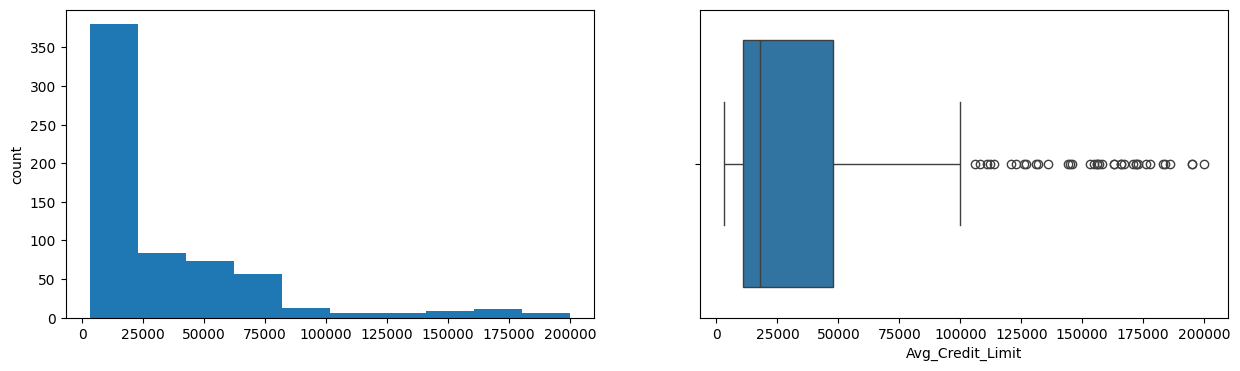

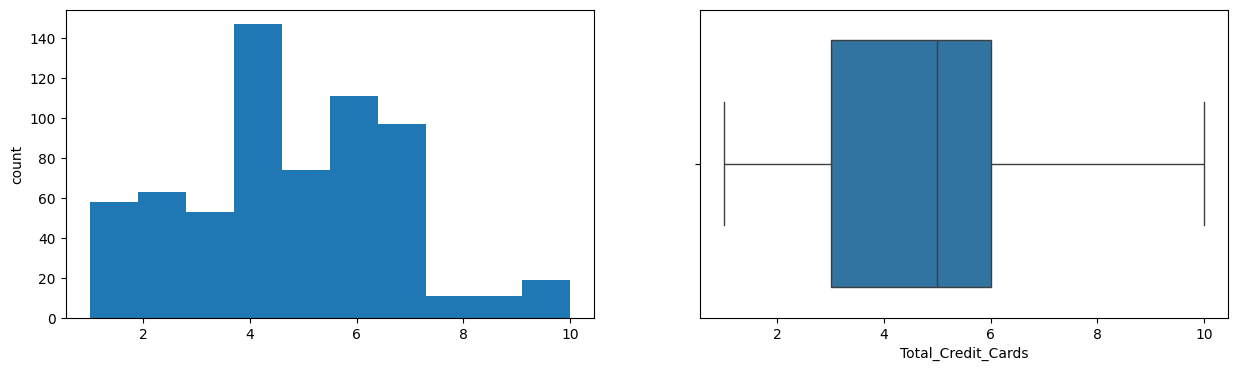

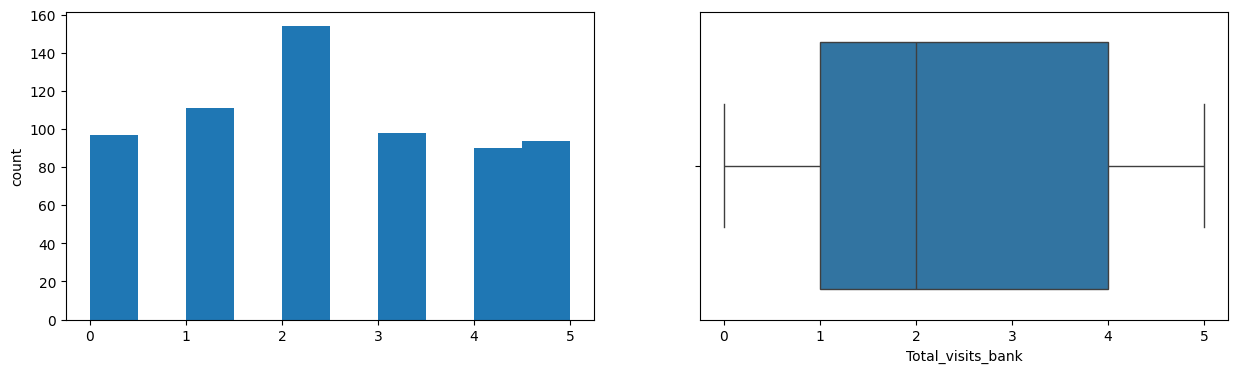

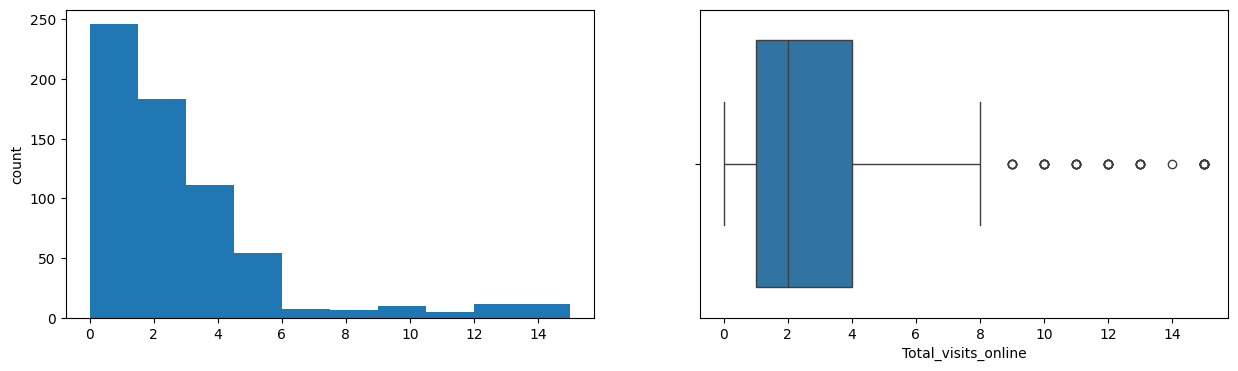

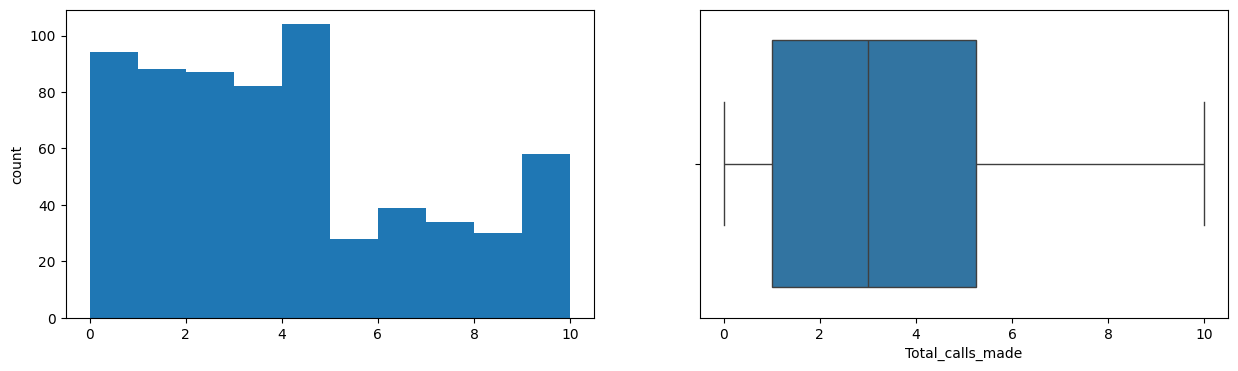

In [15]:
# itterate through the columns of the data
for col in card_df.columns:
  # calculating the skew values
  Skew_value = (round(card_df[col].skew(),2))
  print(col)
  print("skewness:", Skew_value)

  # plot the chats
  plt.figure(figsize=(15, 4))
  plt.subplot(1,2,1)
  card_df[col].hist(bins=10, grid=False)
  plt.ylabel("count")
  plt.subplot(1,2,2)
  sns.boxplot(x=card_df[col])
  plt.show

**Observation:**

- The average credit limit and total visits online has a right skewed distribution with some outliers.
- The majority of customers have 4 credits cards, 2 bank visits, and 4 calls.

**Now, let's check the correlation among different variables.**

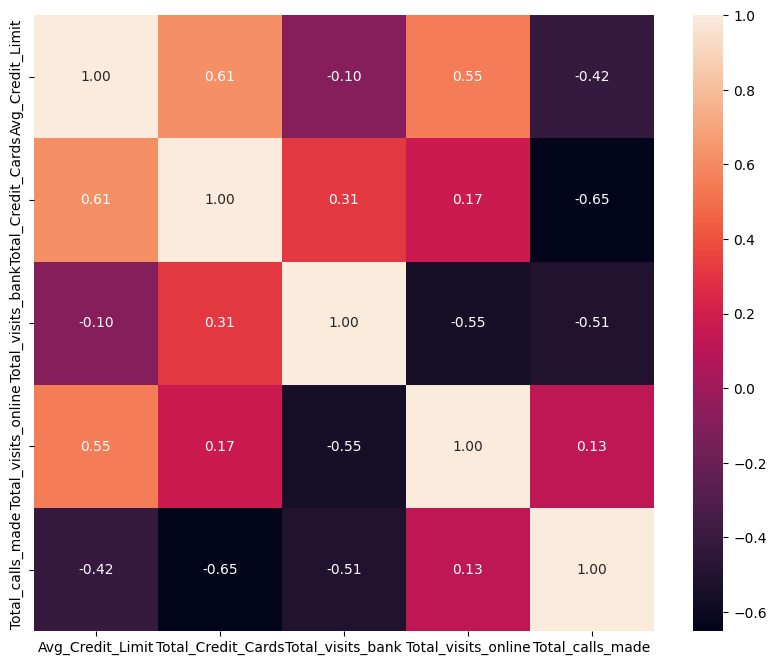

In [16]:
plt.figure(figsize=(10, 8))
sns.heatmap(card_df.corr(), annot=True, fmt="0.2f")
plt.show()

**Observation:**

- Avg_Credit_Limit is positively correlated with Total_Credit_Cards and Total_visits_online which can makes sense.
- Avg_Credit_Limit is negatively correlated with Total_calls_made and Total_visits_bank.
- Total_visits_bank, Total_visits_online, Total_calls_made are negatively correlated which implies that majority of customers use only one of these channels to contact the bank.

### **Scalling the data**

Feature scaling ensures that the distance calculations are not biased by the scale of the features, leading to more accurate clustering.


In [17]:
scaler = StandardScaler()
card_df_scaled = pd.DataFrame(scaler.fit_transform(card_df), columns= card_df.columns)

In [18]:
# displaying the scaled data
card_df_scaled.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1.750192,-1.239437,-0.858684,-0.549573,-1.253982
1,0.413280,-0.779381,-1.473803,2.495669,1.873420
2,0.413280,1.060843,-0.858684,0.127148,0.135974
3,-0.121485,0.140731,-0.858684,-0.549573,0.135974
4,1.750192,0.600787,-1.473803,3.172390,-0.211515


In [19]:
# creating a copy of the data to store labels from each algorithm
card_df_scaled_copy = card_df_scaled.copy(deep = True)

### **Obtaining Inertia (WCSS) Value**

**Inertia**: It is the measure of intra-cluster distances, which means how far away the datapoint is concerning its centroid. This indicates that data points in the same cluster should be well matched and similar to each other For better clustering


#### inertia_  is an attribute of the scikit-learn's KMeans model: After fitting a KMeans model to a dataset, you can access the inertia_ attribute to get the WCSS value for that particular clustering solution.


In [20]:
from sklearn.cluster import KMeans
# we take 3 as number of clusters
kmean_value = KMeans(n_clusters=3)
# let fit the kmeans to the scaled data
kmean_value.fit(card_df_scaled)

# we will access the WSCC value
inertia_value = kmean_value.inertia_
print("WCSS value:", inertia_value)

WCSS value: 904.531407729089


#### The inertia_ value is commonly used in the Elbow Method, where you plot the WCSS values for different values of k and look for an "elbow" in the plot to determine a reasonable number of clusters for your dataset. The point where the reduction in WCSS starts to slow down is often considered a good choice for the number of clusters.

## **Clustering Model Algorithms**

The following four types are the most widely used types of clustering models.
*   **Centroid Model** uses the distance between a data point and the centroid of the cluster to group data. K-means clustering is an example of a centroid model.
*   **Distribution Model** segments data based on their probability of belonging to the same distribution. Gaussian Mixed Model (GMM) is a popular distribution model.
*   **Connectivity Model** uses the closeness of the data points to decide the clusters. Hierarchical Clustering Model is a widely used connectivity model.
*   **Density Model** scans the data space and assigns clusters based on the density of data points. DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a popular density model.

In this project, we will create clustering models for the same dataset using the four algorithms and compare their results.

## **KMeans clustering Algorithm**

Let us now fit k-means algorithm on our scaled data and find out the optimum number of clusters to use.

We will do this in 3 steps:
1. Initialize a dictionary to store the SSE for each k
2. Run for a range of Ks and store SSE for each run
3. Plot the SSE vs K and find the elbow

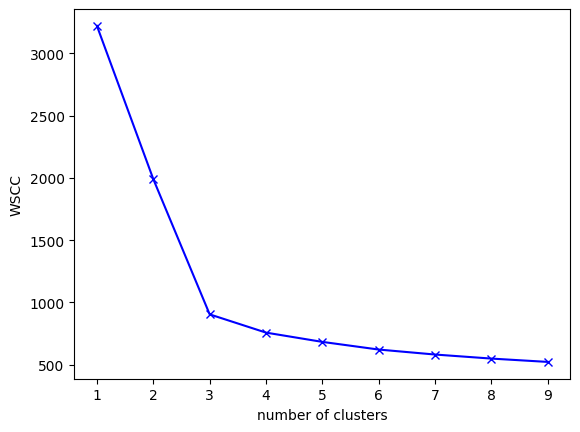

In [21]:
Wcss ={}
# loop to store sse
for k in range(1, 10):
  kmeans = KMeans(n_clusters=k, max_iter=1000). fit(card_df_scaled)
  Wcss[k] = kmeans.inertia_
# plotting the wscc values
plt.figure()
plt.plot(list(Wcss.keys()), list(Wcss.values()), "bx-")
plt.xlabel("number of clusters")
plt.ylabel('WSCC')
plt.show()

**Observations:**
- Looking at the plot, we can say that elbow point is achieved for k=3.
- We will fit the k-means again with k=3 to get the labels.

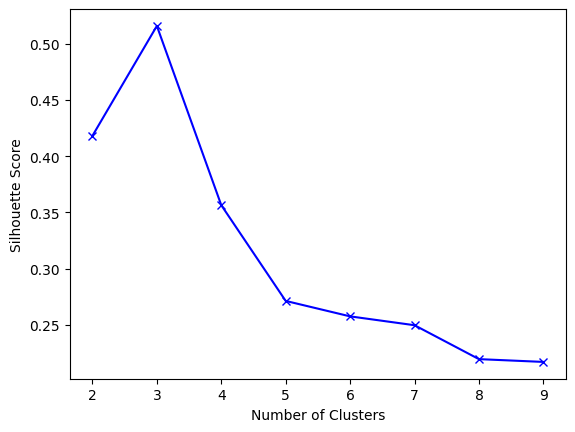

In [22]:
# step 1. Lets create an empty dictionary to store the Silhouette score for each value of k
sc = {}

# iterate for a range of Ks and fit the scaled data to the algorithm. Store the Silhouette score for that k
for k in range (2, 10):
  kmeans = KMeans(n_clusters = k).fit(card_df_scaled)
  labels = kmeans.predict(card_df_scaled)
  sc[k] =  silhouette_score(card_df_scaled, labels)

# Elbow plot
plt.figure()
plt.plot(list(sc.keys()), list(sc.values()), "bx-")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.show()


**Fitting the K-means algorithms on the scaled data with number of cluster equal to 3 and Storing the predictions as 'Labels' to the 'data_scaled_copy' and 'data' dataframes**

In [23]:
kmeans = KMeans(n_clusters = 3, max_iter = 1000, random_state = 1)
kmeans.fit(card_df_scaled)
# Adding predicted labels to the original data and scaled_data
card_df_scaled_copy["Labels"] = kmeans.predict(card_df_scaled)
card_df["Labels"] = kmeans.predict(card_df_scaled)

In [24]:
# lets check the data and scaled data again for the "Labels" column
card_df.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Labels
0,100000,2,1,1,0,1
1,50000,3,0,10,9,0
2,50000,7,1,3,4,1
3,30000,5,1,1,4,1
4,100000,6,0,12,3,2


#### **Creating cluster profiles using the below summary statistics and box plots for each label**

In [25]:
# Number of observations in each cluster
card_df.Labels.value_counts()

1    374
0    221
2     49
Name: Labels, dtype: int64

In [26]:
# calculating the summary statistics for the original data for each label
mean = card_df.groupby("Labels").mean()
median = card_df.groupby("Labels").median()
df_kmeans = pd.concat([mean, median], axis = 0)
df_kmeans.index = ["cluster_0 Mean", "cluster_1 Mean", "cluster_2 Mean", "cluster_0 Median", "cluster_1 Median", "cluster_2 Median"]
df_kmeans.T

,cluster_0 Mean,cluster_1 Mean,cluster_2 Mean,cluster_0 Median,cluster_1 Median,cluster_2 Median
Avg_Credit_Limit,12239.819005,33893.048128,140102.040816,12000.0,31500.0,145000.0
Total_Credit_Cards,2.411765,5.508021,8.775510,2.0,6.0,9.0
Total_visits_bank,0.945701,3.489305,0.591837,1.0,3.0,1.0
Total_visits_online,3.561086,0.975936,10.979592,4.0,1.0,11.0
Total_calls_made,6.891403,1.997326,1.102041,7.0,2.0,1.0


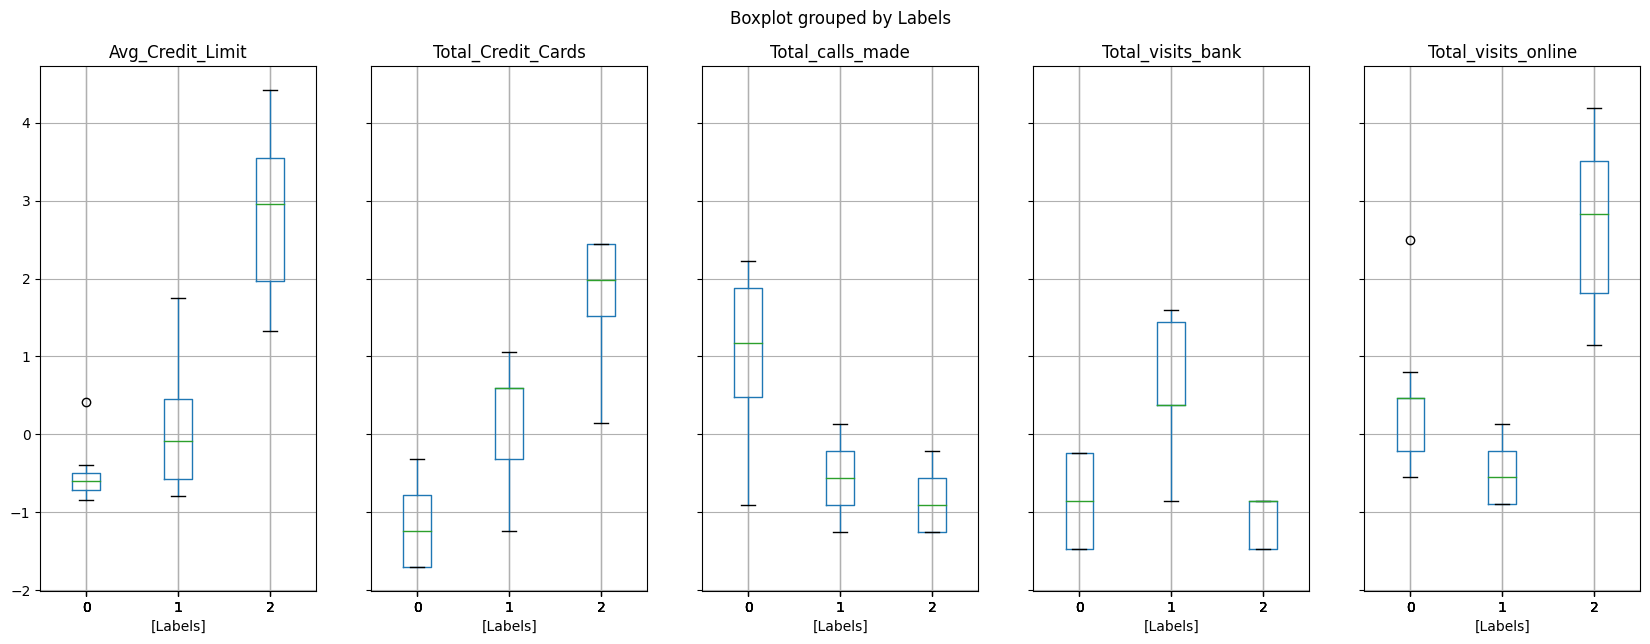

In [27]:
#Visualizing different features w.r.t(with reference to) K-means labels
card_df_scaled_copy.boxplot(by = "Labels", layout = (1,5), figsize = (20,7))
plt.show()

**Cluster Profiles:**
- Cluster 0 - Low Credit Cutsomers: This cluster represents customers with low spending and prefers to interact with the bank via calls and therefore they have less number of bank and online visits.
- Cluster 1 - Medium Credit Customers: This cluster represents customers who spends comparatively more than low credit customers and visits the bank more often and therefore they have less number of calls and online visits.
- Cluster 2 - High Credit Customers: This cluster represents customers with high spending and prefers to contact the bank through online channel and therefore they have less number of total calls and bank visits.

## **KMedoids**

In [28]:
kmedo = KMedoids (n_clusters = 3, random_state = 1)
kmedo.fit(card_df_scaled)

card_df_scaled_copy["kmedoLabels"] = kmedo.predict(card_df_scaled)
card_df["kmedoLabels"] = kmedo.predict(card_df_scaled)

In [29]:
# Number of obsevations in each cluster
card_df.kmedoLabels.value_counts()

2    289
0    222
1    133
Name: kmedoLabels, dtype: int64

**Creating cluster profiles using the below summary statistics and box plots for each label and Comparing the clusters from both algorithms - K-Means and K-Medoids**

In [30]:
# calcuating summary statistics of the original data for each label
original_features = ["Avg_Credit_Limit", "Total_Credit_Cards", "Total_visits_bank", "Total_visits_online", "Total_calls_made"]

mean = card_df.groupby("kmedoLabels").mean()
median = card_df.groupby("kmedoLabels").median()
df_kmedoids = pd.concat([mean, median], axis=0)
df_kmedoids.index = ["cluster_0 Mean", "cluster_1 Mean", "cluster_2 Mean", "cluster_0 Median", "cluster_1 Median", "cluster_2 Median"]
df_kmedoids[original_features].T

,cluster_0 Mean,cluster_1 Mean,cluster_2 Mean,cluster_0 Median,cluster_1 Median,cluster_2 Median
Avg_Credit_Limit,12216.216216,85052.631579,28449.826990,12000.0,68000.0,20000.0
Total_Credit_Cards,2.423423,7.030075,5.363322,2.0,7.0,5.0
Total_visits_bank,0.950450,1.691729,3.830450,1.0,2.0,4.0
Total_visits_online,3.554054,4.639098,0.982699,4.0,2.0,1.0
Total_calls_made,6.878378,1.969925,1.851211,7.0,2.0,2.0


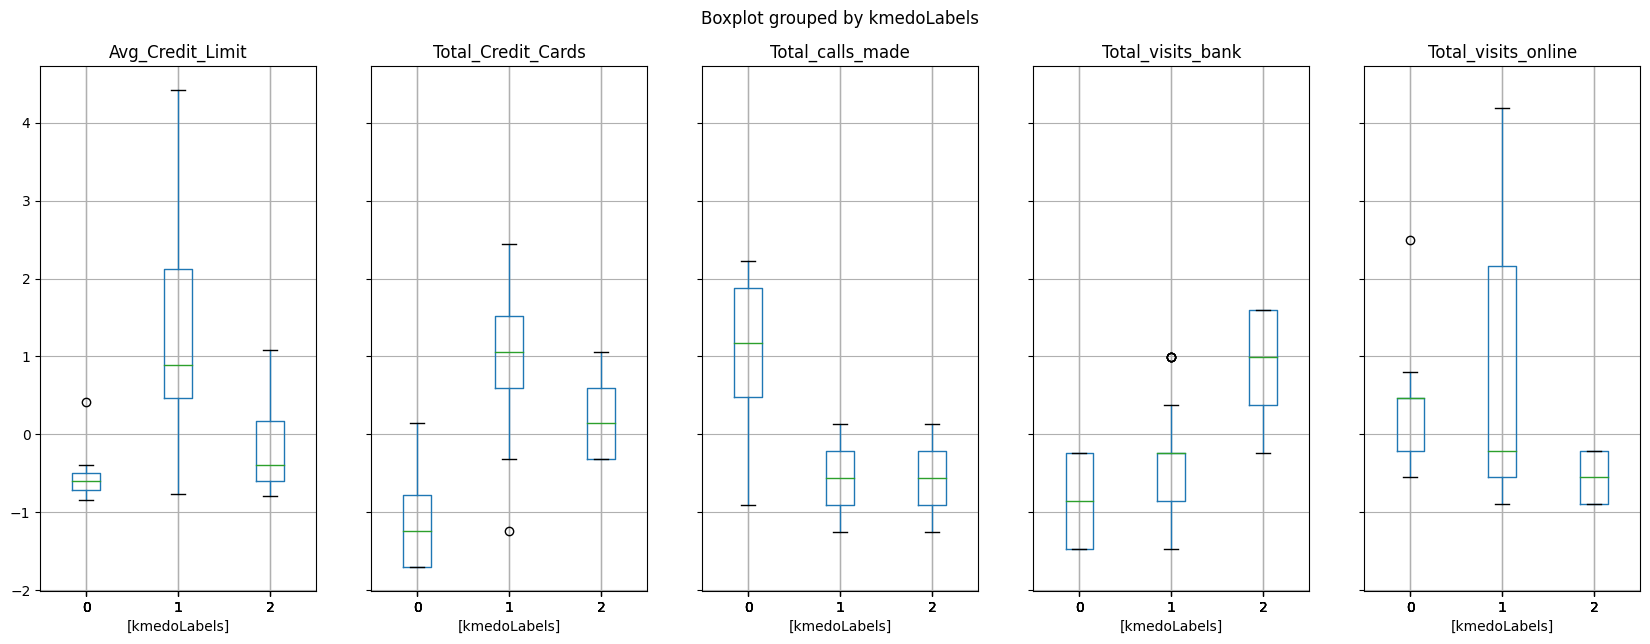

In [31]:
# plotting boxplot with new K-Medoids based labels

labelsfeatures = ["Avg_Credit_Limit","Total_Credit_Cards", "Total_visits_bank", "Total_visits_online", "Total_calls_made", "kmedoLabels"]

card_df_scaled_copy[labelsfeatures].boxplot(by = "kmedoLabels", layout= (1,5), figsize=(20,7))
plt.show()

let us compare the two models, kmeans and kmedoids

In [32]:
kmeans_vs_kmedoids = pd.concat([df_kmeans, df_kmedoids], axis=1)[original_features]
# display the comparison
kmeans_vs_kmedoids

,Avg_Credit_Limit,Avg_Credit_Limit,Total_Credit_Cards,Total_Credit_Cards,Total_visits_bank,Total_visits_bank,Total_visits_online,Total_visits_online,Total_calls_made,Total_calls_made
cluster_0 Mean,12239.819005,12216.216216,2.411765,2.423423,0.945701,0.950450,3.561086,3.554054,6.891403,6.878378
cluster_1 Mean,33893.048128,85052.631579,5.508021,7.030075,3.489305,1.691729,0.975936,4.639098,1.997326,1.969925
cluster_2 Mean,140102.040816,28449.826990,8.775510,5.363322,0.591837,3.830450,10.979592,0.982699,1.102041,1.851211
cluster_0 Median,12000.000000,12000.000000,2.000000,2.000000,1.000000,1.000000,4.000000,4.000000,7.000000,7.000000
cluster_1 Median,31500.000000,68000.000000,6.000000,7.000000,3.000000,2.000000,1.000000,2.000000,2.000000,2.000000
cluster_2 Median,145000.000000,20000.000000,9.000000,5.000000,1.000000,4.000000,11.000000,1.000000,1.000000,2.000000


**Cluster Profiles:**
- Cluster 0 - Low Credit Cutsomers: This cluster represents customers with low spending and prefers to interact with the bank via calls and therefore they have less number of bank and online visits.
- Cluster 1 - High Credit Customers: This cluster represents customers with high spending and prefers to contact the bank through online channel and therefore they have less number of total calls and bank visits.
- Cluster 2 - Medium Credit Customers: This cluster represents customers who spends comparatively more than low credit customers and visits the bank more often and therefore they have less number of calls and online visits.

**Comparing Clusters:**

- The size of clusters (count of observations) from K-Medoids is different from K-means clusters. In K-Medoids, number of observations are evenly distributed among clusters.
- K-Medoids clusters are more compact i.e. have small ranges for all variables. For example, the range of total number of credit cards is from 4 to 7 for medium credit customers from K-Medoids, whereas from K-Means, it is from 2 to 7.
- K-Medoids is more robust to outliers which helps to identify outliers in the clusters. For example, the total number of bank visits has an outlier for high credit customers from K-Medoids, whereas from K-Means, we could not detect any outliers in this variable.

## **Guassian Mixture (GMM) Model**

**Finding Optimal K using Silhouette for GMM model**

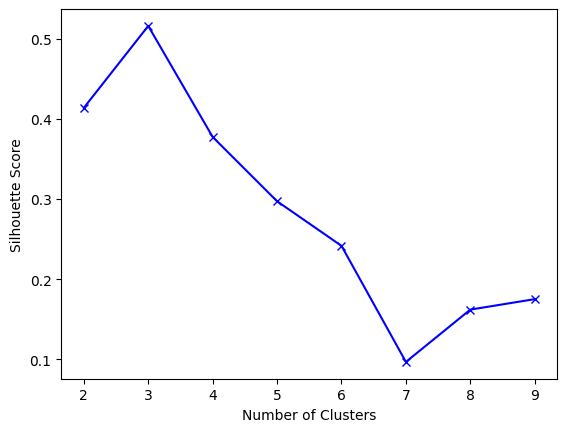

In [33]:
# step 1. Lets create an empty list to store the Silhouette score for each value of k
sc = {}

# iterate for a range of Ks and fit the scaled data to the algorithm. Store the Silhouette score for that k
for k in range (2, 10):
  GMM = GaussianMixture(n_components = k).fit(card_df_scaled)
  labels = GMM.predict(card_df_scaled)
  sc[k] =  silhouette_score(card_df_scaled, labels)

# Elbow plot
plt.figure()
plt.plot((sc.keys()), (sc.values()), "bx-")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.show()


Let us fit the GMM model

In [34]:
GMM = GaussianMixture(n_components=3)
GMM.fit(card_df_scaled)

GaussianMixture(n_components=3)

In [35]:
card_df_scaled_copy["GmmLabels"] = GMM.predict(card_df_scaled)
card_df["GmmLabels"] = GMM.predict(card_df_scaled)

we can display the number of unique observations

In [36]:
card_df.GmmLabels.value_counts()

1    374
0    221
2     49
Name: GmmLabels, dtype: int64

**Creating cluster profiles using the below summary statistics and box plots for each label and Comparing the clusters from both algorithms - K-means and Gaussian Mixture**

In [37]:
mean = card_df.groupby("GmmLabels").mean()
median = card_df.groupby("GmmLabels").median()
df_gmm = pd.concat([mean, median], axis=0)
df_gmm.index = ["cluster_0 Mean", "cluster_1 Mean", "cluster_2 Mean", "cluster_0 Median", "cluster_1 Median", "cluster_2 Median"]
df_gmm[original_features].T

,cluster_0 Mean,cluster_1 Mean,cluster_2 Mean,cluster_0 Median,cluster_1 Median,cluster_2 Median
Avg_Credit_Limit,12239.819005,33893.048128,140102.040816,12000.0,31500.0,145000.0
Total_Credit_Cards,2.411765,5.508021,8.775510,2.0,6.0,9.0
Total_visits_bank,0.945701,3.489305,0.591837,1.0,3.0,1.0
Total_visits_online,3.561086,0.975936,10.979592,4.0,1.0,11.0
Total_calls_made,6.891403,1.997326,1.102041,7.0,2.0,1.0


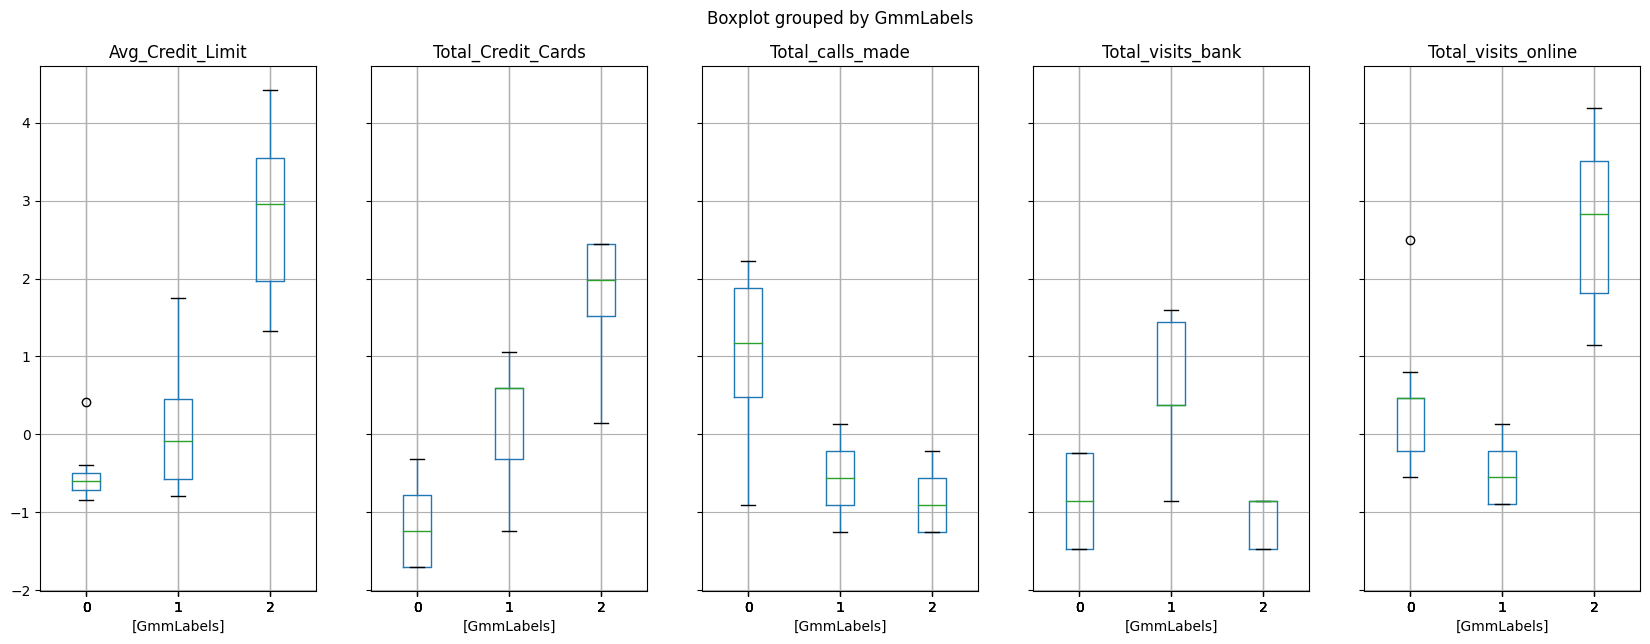

In [38]:
# plotting boxplots with the new new GMM based labels
features_with_labels = ["Avg_Credit_Limit", "Total_Credit_Cards", "Total_visits_bank", "Total_visits_online", "Total_calls_made", "GmmLabels"]

card_df_scaled_copy[features_with_labels].boxplot(by = "GmmLabels", layout=(1,5), figsize = (20,7))
plt.show()

**Cluster Profiles:**

- Cluster 0 - Low Credit Customers: This cluster represents customers with low spending and prefers to interact with the bank via calls and therefore they have less number of bank and online visits.
- Cluster 1 - Medium Credit Customers: This cluster represents customers who spends comparatively more than low credit customers and visits the bank more often and therefore they have less number of calls and online visits.
- Cluster 2 - High Credit Customers: This cluster represents customers with high spending and prefers to contact the bank through online channel and therefore they have less number of total calls and bank visits.

**Comparing Clusters:**

- The cluster profiles are the same as the K-means clusters.

### **Hierarchical Clustering Model**

`AgglomerativeClustering` is a type of hierarchical clustering algorithm.
* It uses a bottom-up approach and starts each data point as an individual cluster.
* Then the clusters that are closest to each other are connected until all the clusters are connected into one.
* The hierarchical clustering algorithms produce a binary tree, where the root of the tree includes all the data points, and the leaves of the tree are the individual data points.

The Python code implementation of the hierarchical clustering model is similar to the KMeans clustering model, we just need to change the method from `KMeans` to `AgglomerativeClustering`.

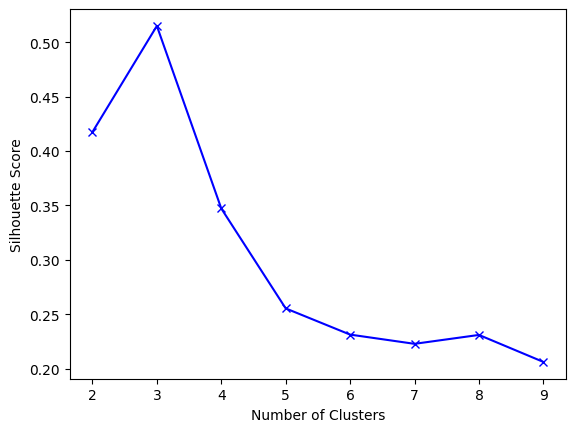

In [39]:
sc = {}

# iterate for a range of Ks and fit the scaled data to the algorithm. Store the Silhouette score for that k
for k in range (2, 10):
  hcm = AgglomerativeClustering(n_clusters = k).fit(card_df_scaled)
  labels = hcm.fit_predict(card_df_scaled)
  sc[k] =  silhouette_score(card_df_scaled, labels)

# Elbow plot
plt.figure()
plt.plot((sc.keys()), (sc.values()), "bx-")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.show()


### **fitting the HC model**

In [40]:
hc_model = AgglomerativeClustering(n_clusters=3)
hc_model.fit(card_df_scaled)

AgglomerativeClustering(n_clusters=3)

In [41]:
card_df_scaled_copy["hcmodelLabels"] = hc_model.fit_predict(card_df_scaled)
card_df["hcmodelLabels"] = hc_model.fit_predict(card_df_scaled)

In [42]:
# count the observations
card_df.hcmodelLabels.value_counts()

0    373
1    222
2     49
Name: hcmodelLabels, dtype: int64

creating the HC model summary

In [43]:
mean = card_df.groupby("hcmodelLabels").mean()
median = card_df.groupby("hcmodelLabels").median()

df_hc_model = pd.concat([mean, median], axis=0)

df_hc_model.index = ["cluster_0 Mean", "cluster_1 Mean", "cluster_2 Mean", "cluster_0 Median", "cluster_1 Median", "cluster_2 Median"]
df_hc_model[original_features].T

,cluster_0 Mean,cluster_1 Mean,cluster_2 Mean,cluster_0 Median,cluster_1 Median,cluster_2 Median
Avg_Credit_Limit,33965.147453,12216.216216,140102.040816,32000.0,12000.0,145000.0
Total_Credit_Cards,5.509383,2.423423,8.775510,6.0,2.0,9.0
Total_visits_bank,3.493298,0.950450,0.591837,3.0,1.0,1.0
Total_visits_online,0.973190,3.554054,10.979592,1.0,4.0,11.0
Total_calls_made,1.991957,6.878378,1.102041,2.0,7.0,1.0


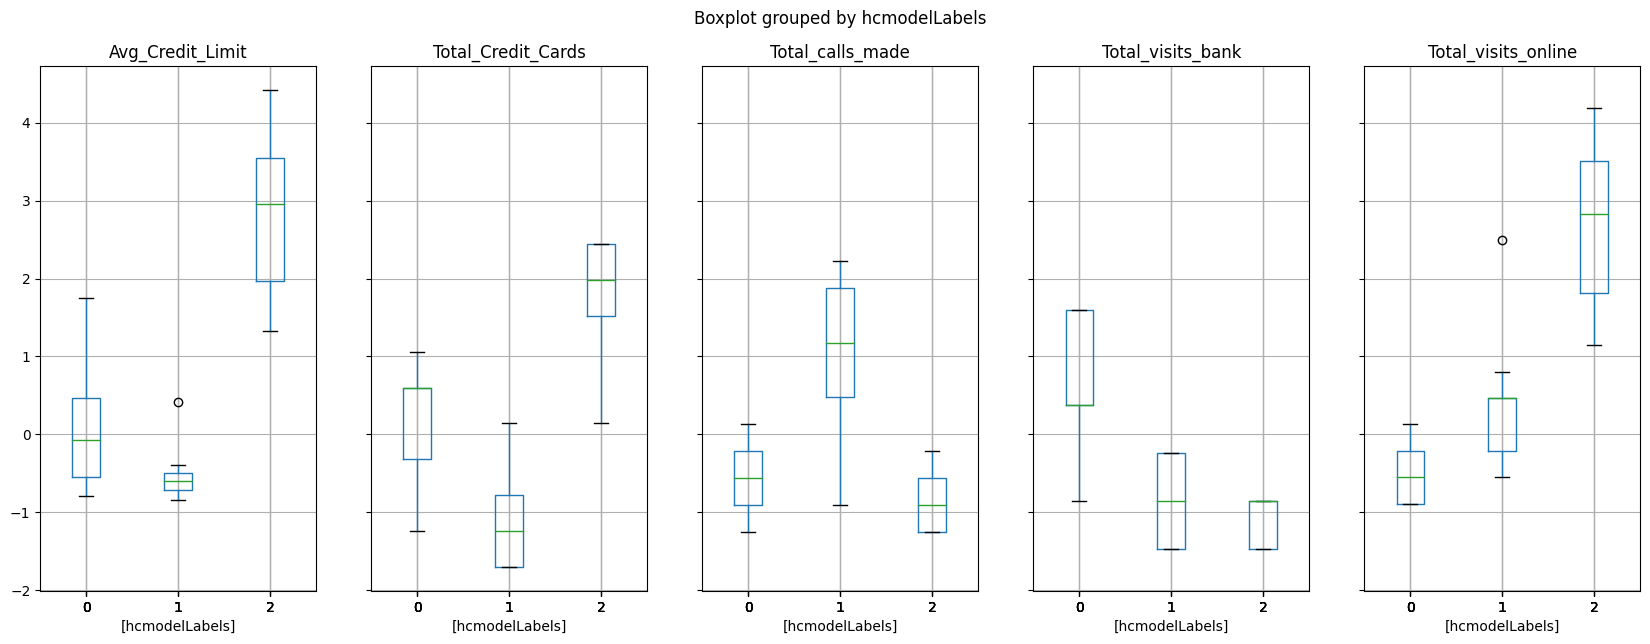

In [44]:
# plotting boxplot with new K-Medoids based labels

features_with_labels = ["Avg_Credit_Limit","Total_Credit_Cards", "Total_visits_bank", "Total_visits_online", "Total_calls_made", "hcmodelLabels"]

card_df_scaled_copy[features_with_labels].boxplot(by = "hcmodelLabels", layout= (1,5), figsize=(20,7))
plt.show()

**Cluster Profiles:**

- Cluster 0 - Medium Credit Customers: This cluster represents customers with slightly higher spending than the low credit customers and prefers to visit the bank and therefore they have less number of calls and online visits.
- Cluster 1 - Low Credit Customers: This cluster represents customers who spends comparatively more than low credit customers and do not visit the bank more often and therefore they have more number of calls and a very small online visits and do not have credit cards.
- Cluster 2 - High Credit Customers: This cluster represents customers with high spending and prefers to contact the bank through online channel and therefore they have less number of total calls and bank visits.


### **Density-based spatial clustering of applications with noise (DBSCAN) (Model 4)**

In [45]:
# Creating a DBSCAN object
dbscan = DBSCAN(eps=0.8, min_samples=5)

# Fitting DBSCAN to the scaled data
dbscan.fit(card_df_scaled)

# Adding predicted labels to the original data and scaled data
card_df_scaled_copy["Labels_DBSCAN"] = dbscan.labels_
card_df["Labels_DBSCAN"] = dbscan.labels_


In [46]:
# count the observations
card_df.Labels_DBSCAN.value_counts()

 0    591
-1     40
 1     13
Name: Labels_DBSCAN, dtype: int64

## **Dimensionality Reduction**

we will use two popular algorithms, PCA (Principal Component Analysis) and t-SNE (t-distributed stochastic neighbor embedding) to reduce the dimensionality of the dataset for visualization. There are five features in the dataset. We need to convert the features from a 5-dimensional space to a 2-dimensional space.  The output from PCA and t-SNE are saved in the dataframe as columns.



In [47]:
# Dimensionality reduction
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


In [48]:
# PCA with 2 components
pca=PCA(n_components=2).fit_transform(card_df_scaled)

# Create columns for the 2 PCA components
card_df['PCA1'] = pca[:, 0]
card_df['PCA2'] = pca[:, 1]

# TSNE with 2 components
tsne=TSNE(n_components=2).fit_transform(card_df_scaled)

# Create columns for the 2 TSNE components
card_df['TSNE1'] = tsne[:, 0]
card_df['TSNE2'] = tsne[:, 1]

# Take a look at the data
card_df.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Labels,kmedoLabels,GmmLabels,hcmodelLabels,Labels_DBSCAN,PCA1,PCA2,TSNE1,TSNE2
0,100000,2,1,1,0,1,1,1,0,-1,0.520075,0.513577,8.208297,2.071735
1,50000,3,0,10,9,0,0,0,1,-1,-1.420238,3.098904,-36.221607,10.073938
2,50000,7,1,3,4,1,1,1,0,-1,0.539699,0.815314,13.200771,8.841909
3,30000,5,1,1,4,1,1,1,0,0,-0.352709,0.127433,-0.751638,-1.889607
4,100000,6,0,12,3,2,1,2,2,-1,1.303723,3.640665,9.129725,39.936665


[Text(0.5, 1.0, 'DBSCAN')]

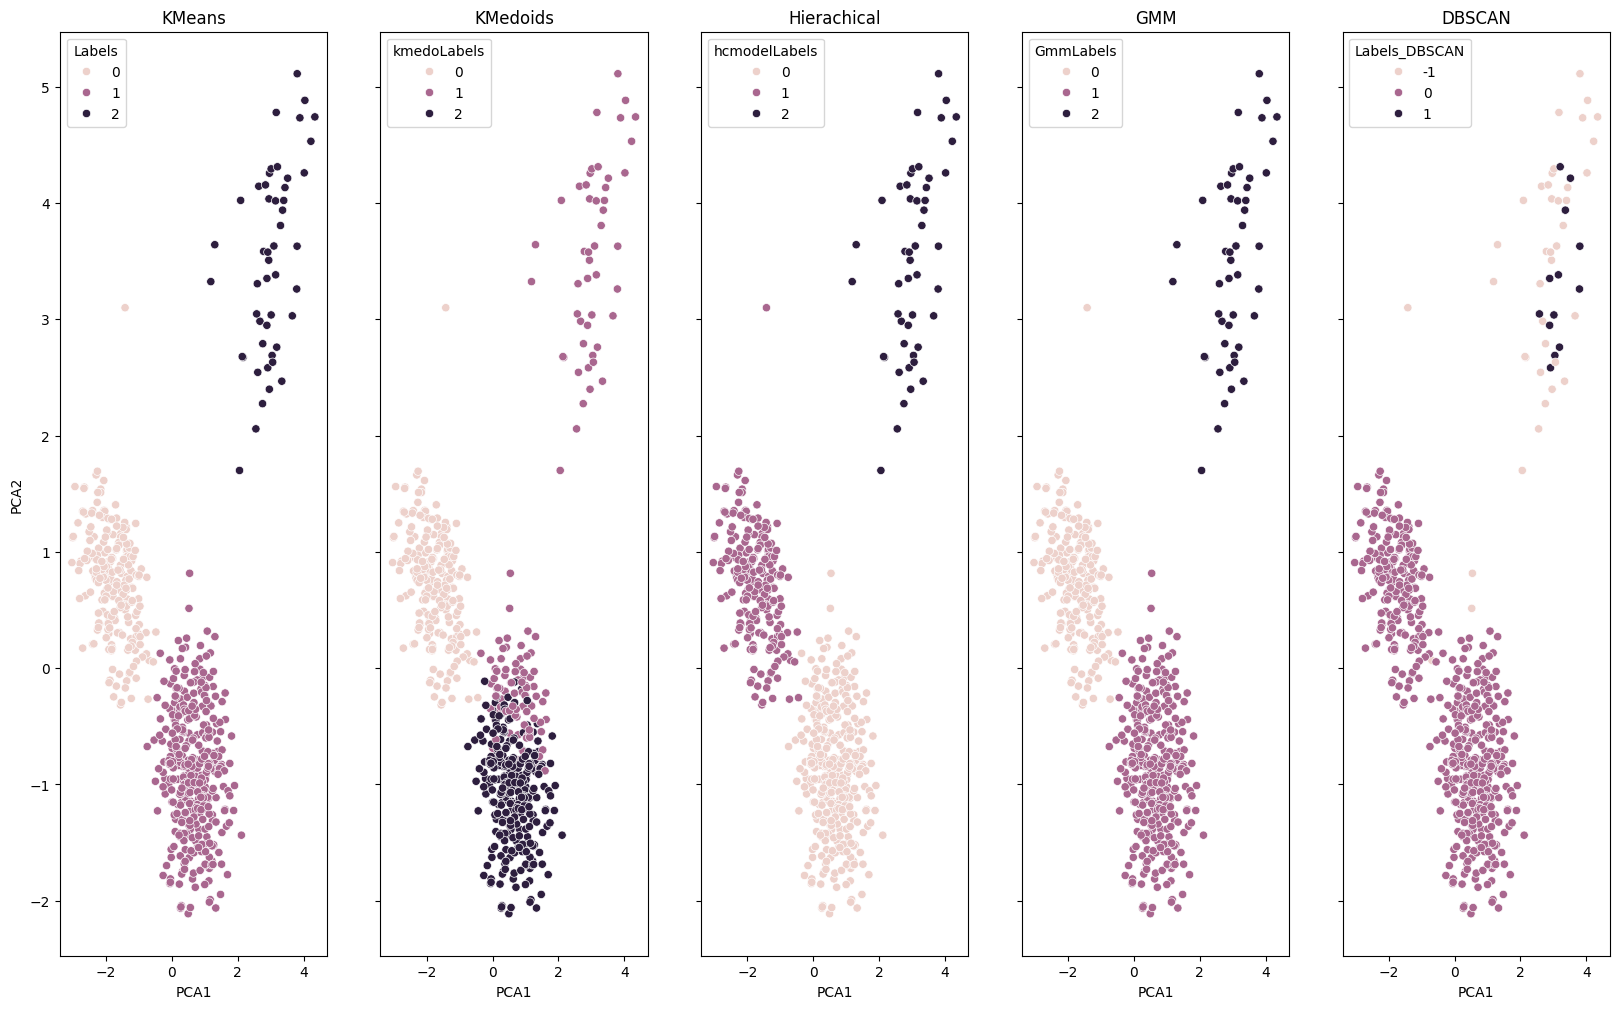

In [49]:
# Visualization using PCA
fig, axs = plt.subplots(ncols=5, sharey=True, figsize=(20,12))
sns.scatterplot(x='PCA1', y='PCA2', data=card_df, hue='Labels', ax=axs[0]).set(title='KMeans')
sns.scatterplot(x='PCA1', y='PCA2', data=card_df, hue='kmedoLabels', ax=axs[1]).set(title='KMedoids')
sns.scatterplot(x='PCA1', y='PCA2', data=card_df, hue='hcmodelLabels', ax=axs[2]).set(title='Hierachical')
sns.scatterplot(x='PCA1', y='PCA2', data=card_df, hue='GmmLabels', ax=axs[3]).set(title='GMM')
sns.scatterplot(x='PCA1', y='PCA2', data=card_df, hue='Labels_DBSCAN', ax=axs[4]).set(title='DBSCAN')

[Text(0.5, 1.0, 'DBSCAN')]

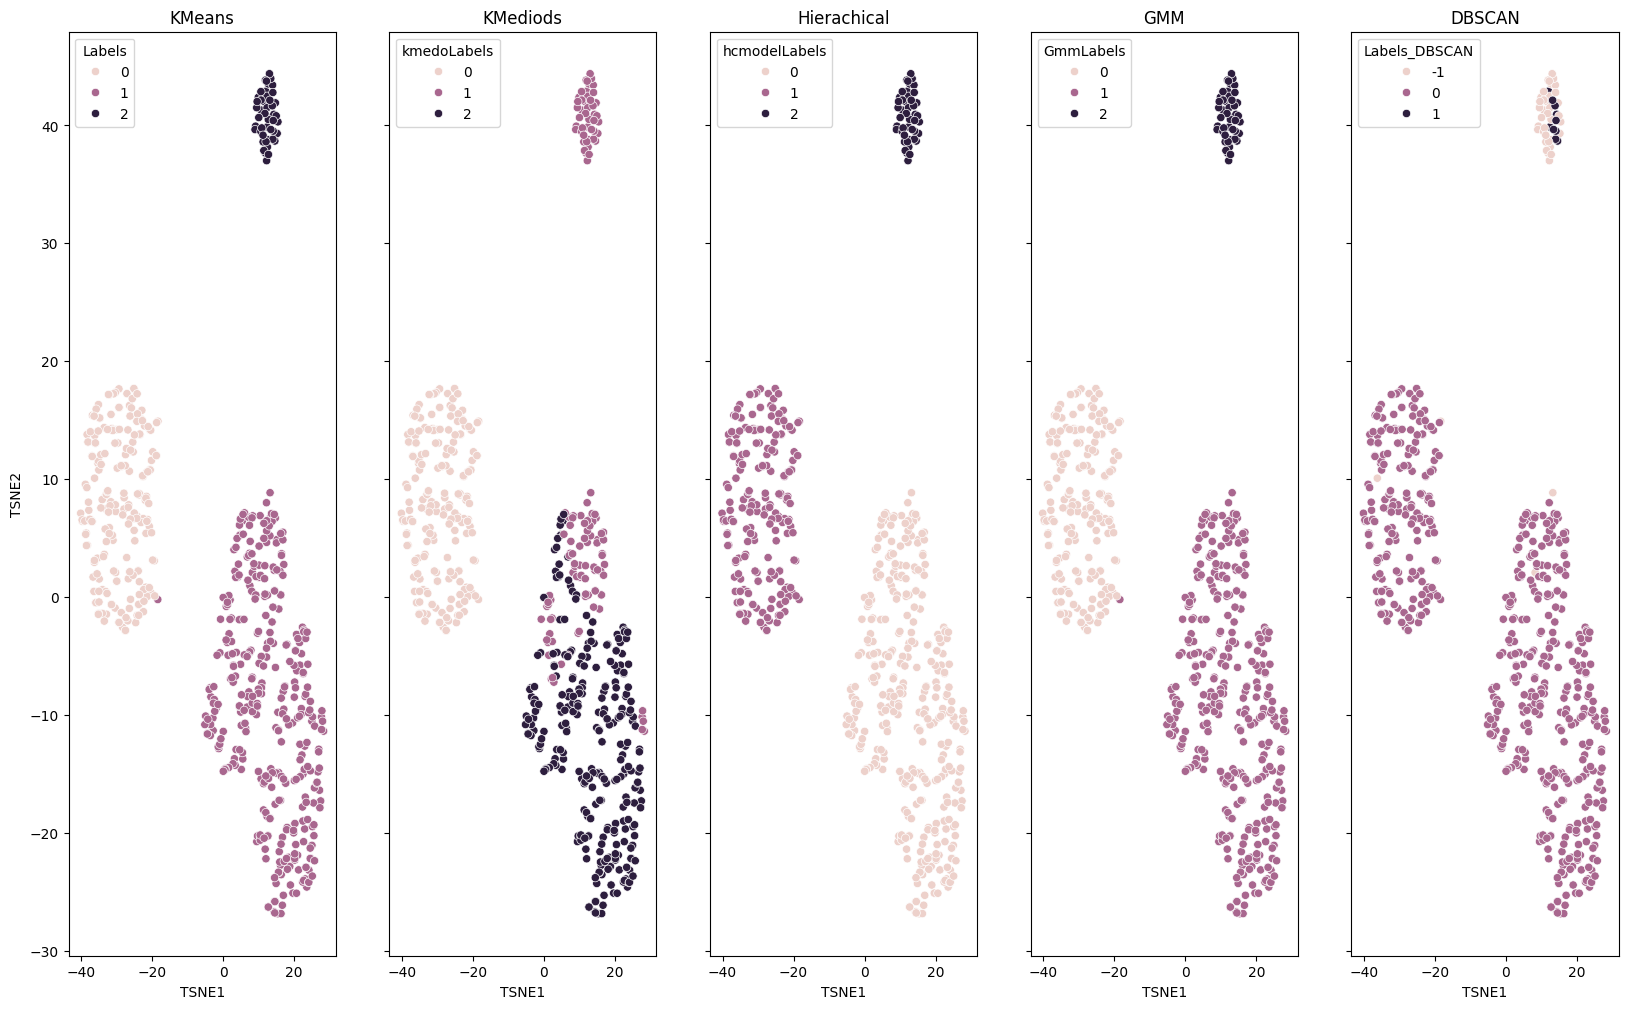

In [50]:
# Visualization using t-SNE
fig, axs = plt.subplots(ncols=5, sharey=True, figsize=(20,12))
sns.scatterplot(x='TSNE1', y='TSNE2', data=card_df, hue='Labels', ax=axs[0]).set(title='KMeans')
sns.scatterplot(x='TSNE1', y='TSNE2', data=card_df, hue='kmedoLabels', ax=axs[1]).set(title='KMediods')
sns.scatterplot(x='TSNE1', y='TSNE2', data=card_df, hue='hcmodelLabels', ax=axs[2]).set(title='Hierachical')
sns.scatterplot(x='TSNE1', y='TSNE2', data=card_df, hue='GmmLabels', ax=axs[3]).set(title='GMM')
sns.scatterplot(x='TSNE1', y='TSNE2', data=card_df, hue='Labels_DBSCAN', ax=axs[4]).set(title='DBSCAN')

In [51]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

# Silhouette Score
silhouette_scores = [
    silhouette_score(card_df_scaled, card_df['Labels']),
    silhouette_score(card_df_scaled, card_df['kmedoLabels']),
    silhouette_score(card_df_scaled, card_df['hcmodelLabels']),
    silhouette_score(card_df_scaled, card_df['GmmLabels']),
    silhouette_score(card_df_scaled, card_df['Labels_DBSCAN'])
]


In [52]:
print("the silhouette scores are given below:")
silhouette_scores

the silhouette scores are given below:


[0.5159851043844376,
 0.3946188217399401,
 0.5150329358493174,
 0.5159851043844376,
 0.4999887415386511]

Based on the silhouette scores:

- K-means and Gaussian Mixture have the highest silhouette scores, indicating well-separated and compact clusters.
- K-medoids and HC have lower silhouette scores, suggesting less distinct clusters.
- DBSCAN also has a relatively high silhouette score, indicating reasonably well-separated clusters.

Based on the silhouette scores alone, K-means, Gaussian Mixture, and DBSCAN seem to perform relatively well, while K-medoids and HC perform slightly worse.

In [53]:
# Calinski-Harabasz Index
calinski_harabasz_scores = [
    calinski_harabasz_score(card_df_scaled, card_df['Labels']),
    calinski_harabasz_score(card_df_scaled, card_df['kmedoLabels']),
    calinski_harabasz_score(card_df_scaled, card_df['hcmodelLabels']),
    calinski_harabasz_score(card_df_scaled, card_df['GmmLabels']),
    calinski_harabasz_score(card_df_scaled, card_df['Labels_DBSCAN'])

]


In [54]:
print(" the calinski_harabasz_scores are given below:")
calinski_harabasz_scores

 the calinski_harabasz_scores are given below:


[820.4332956065696,
 400.46277153115005,
 819.0327901194491,
 820.4332956065696,
 165.000637249307]

Based on the Calinski-Harabasz scores:

- K-means and Gaussian Mixture have the highest scores, indicating well-separated and dense clusters with high inter-cluster variance and low intra-cluster variance.
- K-medoids and HC have lower scores, suggesting less distinct clusters.
- DBSCAN has the lowest score, indicating poor cluster separation and compactness.

Based on the Calinski-Harabasz scores alone, K-means and Gaussian Mixture appear to perform the best, followed by HC and K-medoids. DBSCAN performs the worst.

In [55]:
# Davies-Bouldin Index
davies_bouldin_scores = [
    davies_bouldin_score(card_df_scaled, card_df['Labels']),
    davies_bouldin_score(card_df_scaled, card_df['kmedoLabels']),
    davies_bouldin_score(card_df_scaled, card_df['hcmodelLabels']),
    davies_bouldin_score(card_df_scaled, card_df['GmmLabels']),
    davies_bouldin_score(card_df_scaled, card_df['Labels_DBSCAN'])
]

In [56]:
print(" the davies_bouldin_scores are given below:")
davies_bouldin_scores

 the davies_bouldin_scores are given below:


[0.6782210534216518,
 1.2475161409052946,
 0.6794779106738528,
 0.6782210534216518,
 2.136923056474482]

Based on the Davies-Bouldin scores:

- K-means and Gaussian Mixture have the lowest scores, indicating better cluster separation and compactness.
- K-medoids and HC have higher scores, suggesting less distinct clusters.
- DBSCAN has the highest score, indicating poor cluster separation and compactness.

Based on the Davies-Bouldin scores alone, K-means and Gaussian Mixture appear to perform the best, followed by HC and K-medoids. DBSCAN performs the worst.

## **Chooosing he best model**

judging from the above 3 model evaluations methods use, we can conclude that Kmeans clustering model and Guassian Mixture model performed best.

## **Credit Card Segmentation**

We will proceed to investigating how the model segmented the credit cards for each features

we have two models with the same accuracy the Kmeans and Guassian mixture


### **Using the Guassian Mixture Model**

<Axes: xlabel='GmmLabels', ylabel='Total_visits_online'>

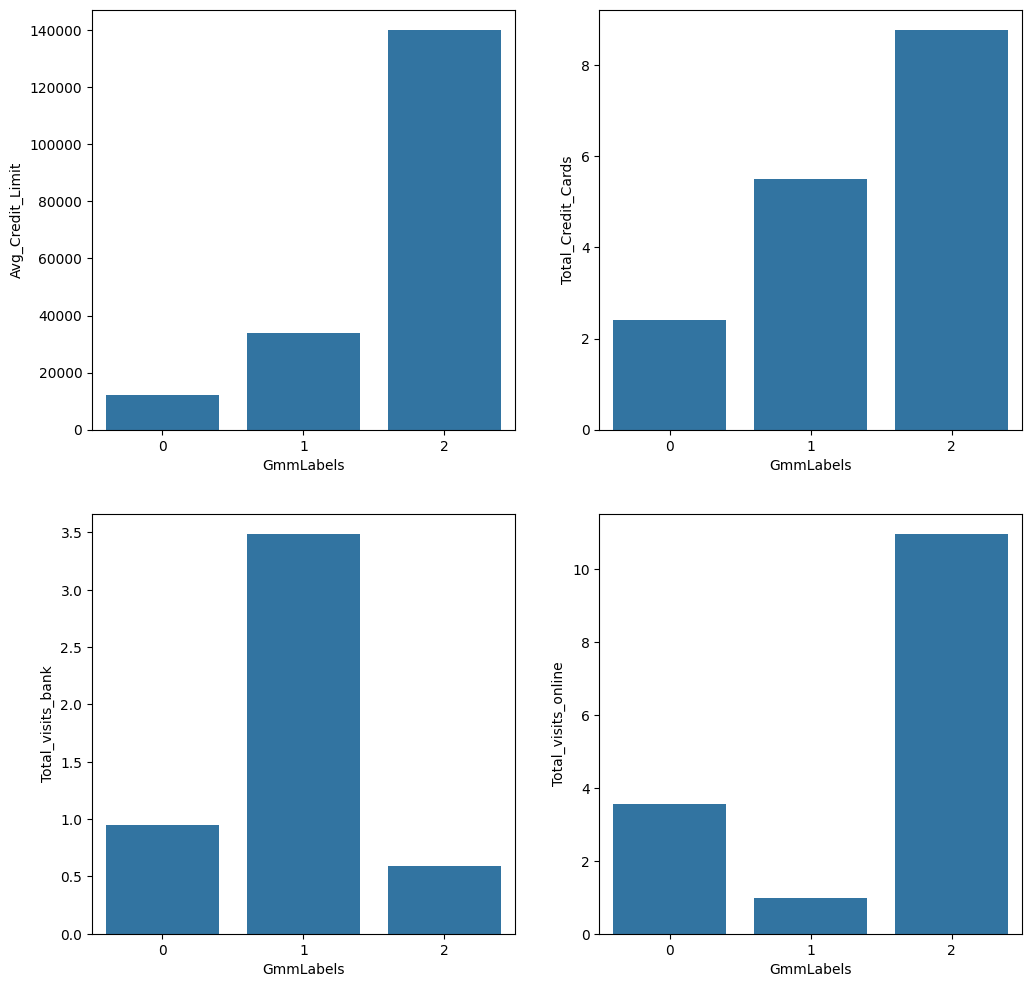

In [68]:
# Feature list
varList = ['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank', 'Total_visits_online', 'Total_calls_made']
# Calculate average values by predicted cluster
avg = pd.DataFrame(card_df.groupby(['GmmLabels'])[varList].mean().reset_index())

# Visualizae the average values by cluster for each feature
fig, axs = plt.subplots(nrows=2, ncols=2, sharey=False, figsize=(12,12))
sns.barplot(x='GmmLabels', y=varList[0], data=avg, ax=axs[0,0])
sns.barplot(x='GmmLabels', y=varList[1], data=avg, ax=axs[0,1])
sns.barplot(x='GmmLabels', y=varList[2], data=avg, ax=axs[1,0])
sns.barplot(x='GmmLabels', y=varList[3], data=avg, ax=axs[1,1])

<Axes: xlabel='GmmLabels', ylabel='Total_calls_made'>

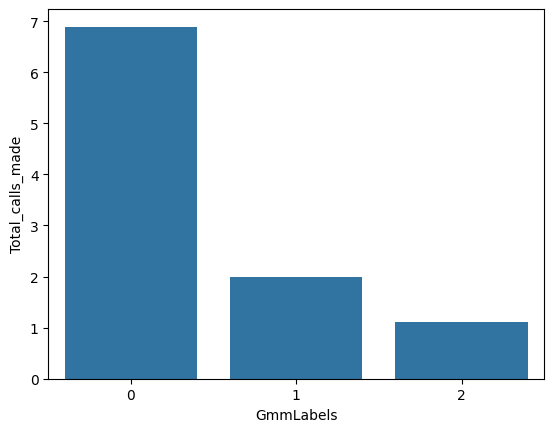

In [60]:
sns.barplot(x='GmmLabels', y=varList[4], data=avg,)

## **Using Kmeans Model**

<Axes: xlabel='Labels', ylabel='Total_visits_online'>

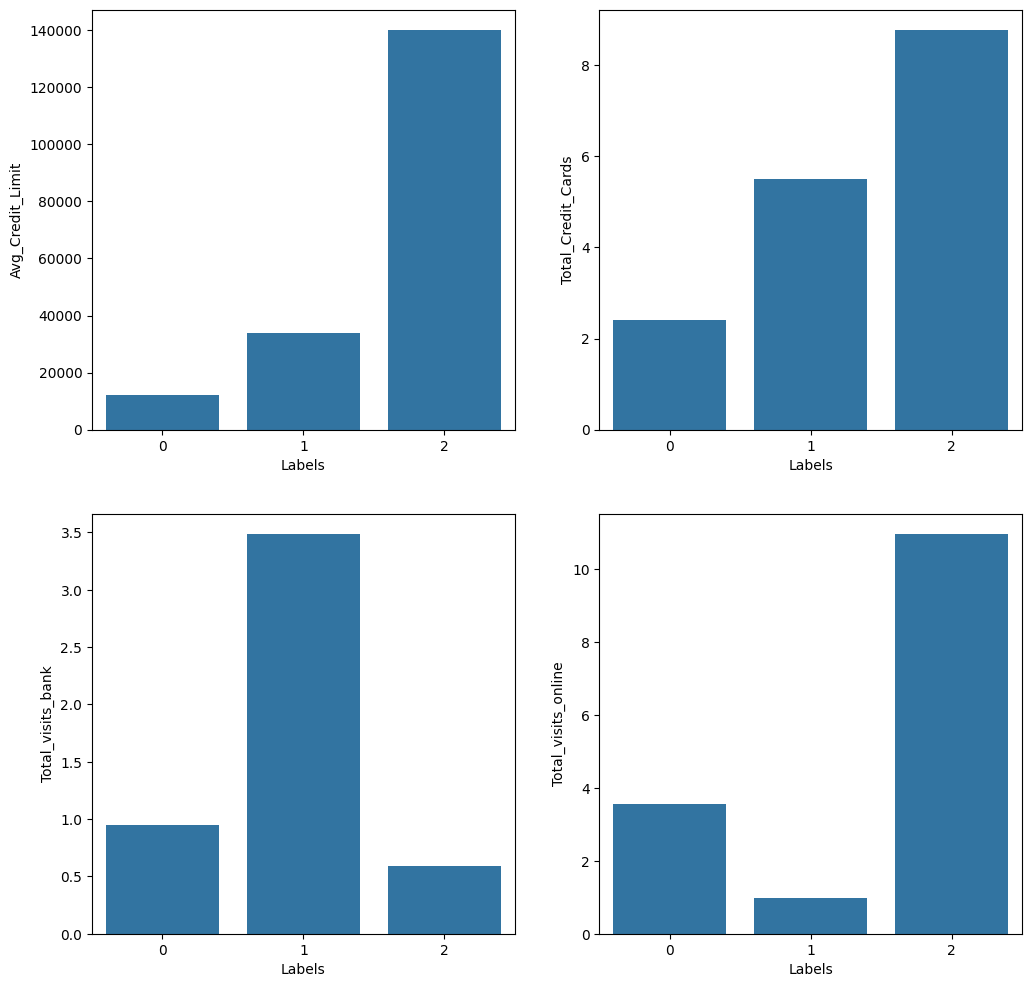

In [65]:
# Feature list
varList = ['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank', 'Total_visits_online', 'Total_calls_made']
# Calculate average values by predicted cluster
avg = pd.DataFrame(card_df.groupby(['Labels'])[varList].mean().reset_index())

# Visualizae the average values by cluster for each feature
fig, axs = plt.subplots(nrows=2, ncols=2, sharey=False, figsize=(12,12))
sns.barplot(x='Labels', y=varList[0], data=avg, ax=axs[0,0])
sns.barplot(x='Labels', y=varList[1], data=avg, ax=axs[0,1])
sns.barplot(x='Labels', y=varList[2], data=avg, ax=axs[1,0])
sns.barplot(x='Labels', y=varList[3], data=avg, ax=axs[1,1])

<Axes: xlabel='Labels', ylabel='Total_calls_made'>

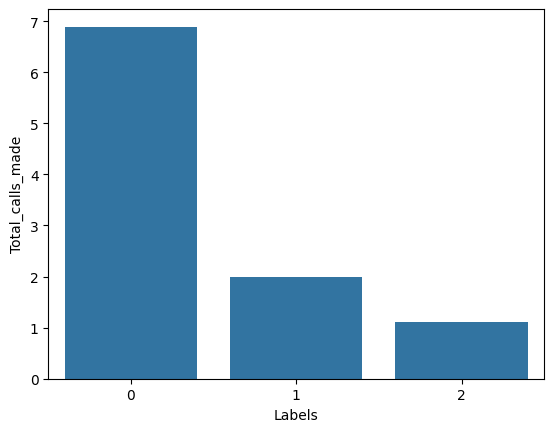

In [67]:
sns.barplot(x='Labels', y=varList[4], data=avg)

## **Saving the model**

We will proceed to save the two models. i.e, the Kmeans and the GMM

In [69]:
import pickle
filename1 = 'card_segmentation_GMMModel.sav'
pickle.dump(GMM, open(filename1,'wb'))

In [71]:
# saving the kmean model
filename1 = 'card_segmentation_KmeansModel.sav'
pickle.dump(kmeans, open(filename1,'wb'))